<a href="https://colab.research.google.com/github/crislainesc/Aprendizado-de-Maquina-na-Pratica/blob/Atividade/Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anánile de agrupamento**

**Previsão de insuficiência cardíaca**

*   Data set com informações clínicas que podem permitir a criação de um modelo capaz de prever a mortalidade por insuficiência cardíaca.
*   [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
*   12 características clínicas que podem prognosticar eventos de morte.
*   299 instâncias.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**1. Importando bibliotecas**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

**2. Lendo dados**

In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Semana 4/heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**3. Organização dos dados**

In [4]:
# Excluindo as colunas que não serão necessárias por não influenciarem diretamente na insuficiência cardíaca.
data = data.drop(columns=['creatinine_phosphokinase','platelets','serum_sodium','sex','smoking'])

**4. Re-escala dos dados**

In [5]:
data = (data - data.min())/(data.max() - data.min())

**5. Organizando dados para modelagem**

In [6]:
# Movendo a coluna evento de morte para o início
data = data[['DEATH_EVENT','age','anaemia','diabetes','ejection_fraction','high_blood_pressure','time','serum_creatinine',]]
X = data.iloc[:,1:]
X.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,time,serum_creatinine
0,0.636364,0.0,0.0,0.090909,1.0,0.000000,0.157303
1,0.272727,0.0,0.0,0.363636,0.0,0.007117,0.067416
2,0.454545,0.0,0.0,0.090909,0.0,0.010676,0.089888
3,0.181818,1.0,0.0,0.090909,0.0,0.010676,0.157303
4,0.454545,1.0,1.0,0.090909,0.0,0.014235,0.247191


In [7]:
y = data.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

**6. Definindo o algotitmo de agrupamento**

Criando o modelo e ajustando aos dados

In [8]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Aplicando o modelo aos dados de teste

In [9]:
kmeans_labels = k_means.predict(X)
kmeans_labels

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtyp

Visualizando os resultados do agrupamento

In [10]:
X = X.reset_index(drop = True)

In [11]:
# Adicionando labels ao teste para fins avaliativos
groups = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'DEATH_EVENT',groups)

In [12]:
lived = X[X['DEATH_EVENT']==0]
died  = X[X['DEATH_EVENT']==1]

In [13]:
plt.rcParams['figure.figsize'] = (8,5)

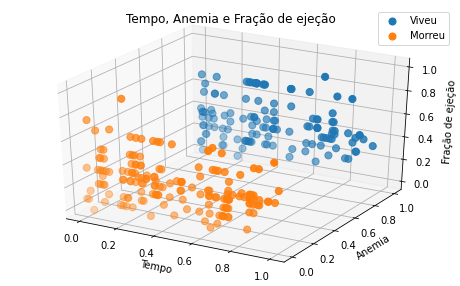

In [14]:
# Plotando alguns atributos
ax = plt.axes(projection='3d')
ax.scatter3D(lived.time, lived.anaemia, lived.ejection_fraction, s=50, label='Viveu')
ax.scatter3D(died.time, died.anaemia, died.ejection_fraction, s=50, label='Morreu')
plt.legend()
ax.set_xlabel('Tempo')
ax.set_ylabel('Anemia')
ax.set_zlabel('Fração de ejeção')
plt.title('Tempo, Anemia e Fração de ejeção')
plt.show()

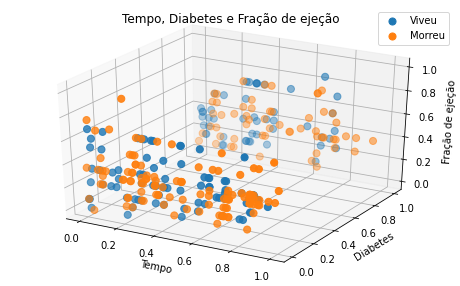

In [15]:
ax = plt.axes(projection='3d')
ax.scatter3D(lived.time, lived.high_blood_pressure, lived.ejection_fraction, s=50, label='Viveu')
ax.scatter3D(died.time, died.high_blood_pressure, died.ejection_fraction, s=50, label='Morreu')
plt.legend()
ax.set_xlabel('Tempo')
ax.set_ylabel('Diabetes')
ax.set_zlabel('Fração de ejeção')
plt.title('Tempo, Diabetes e Fração de ejeção')
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = (25,20)

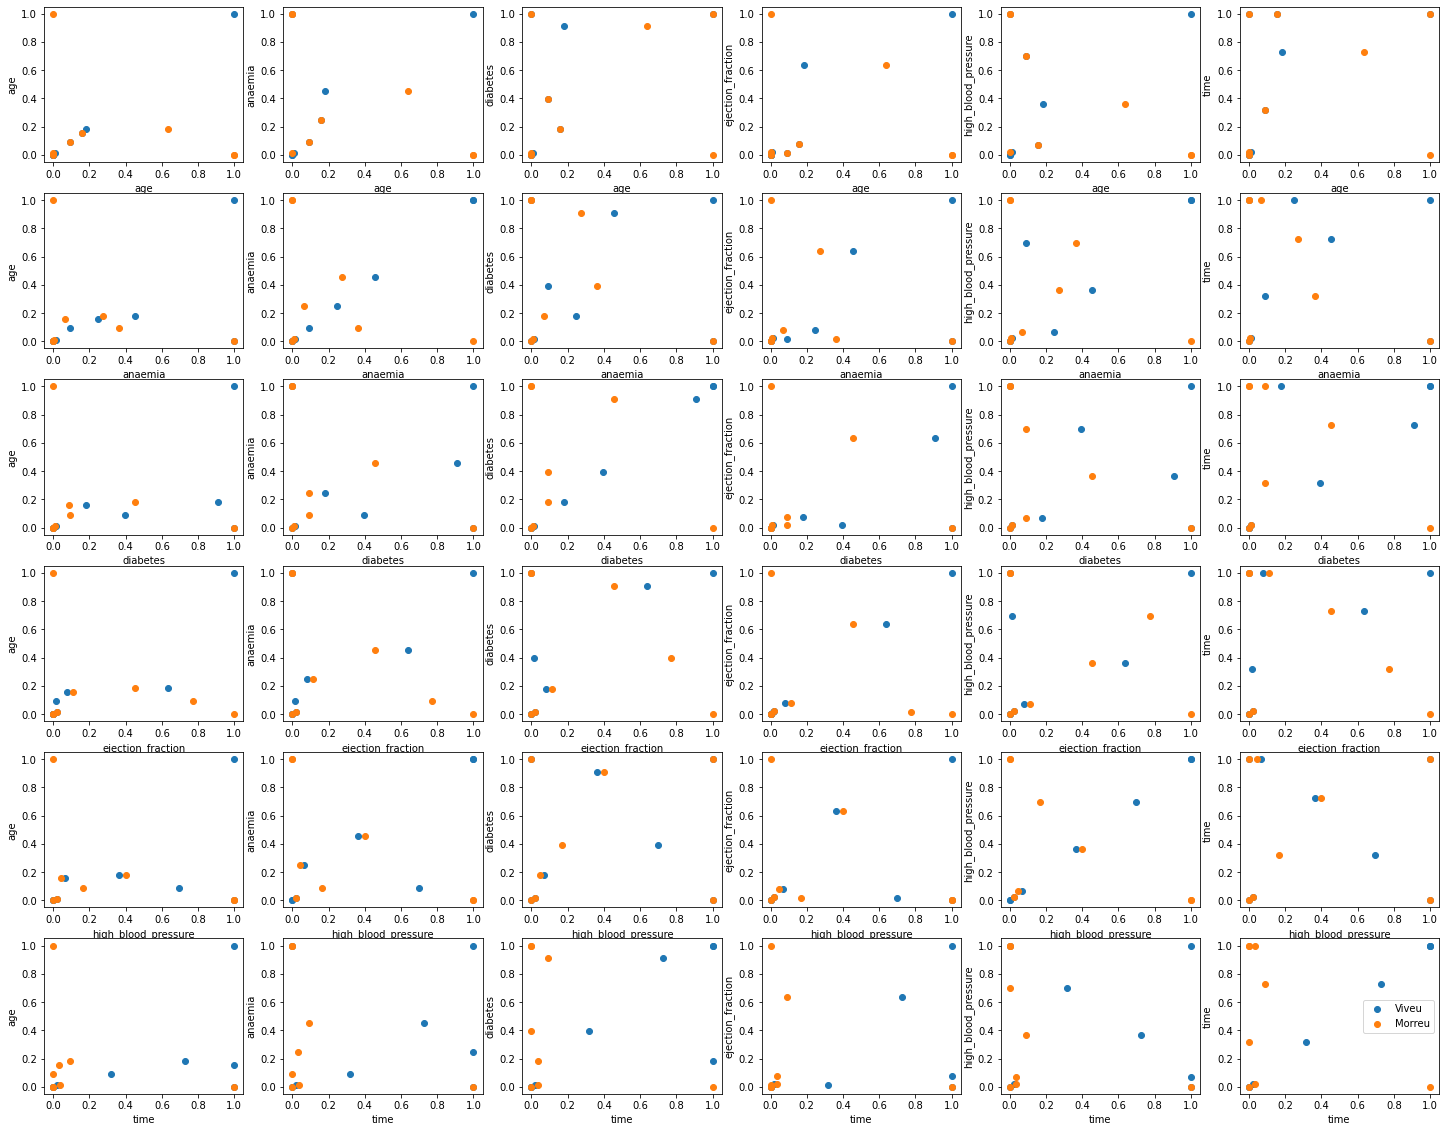

In [17]:
# Comparação de alguns atributos
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i, j].scatter(lived.iloc[i], lived.iloc[j], label='Viveu')
    axs[i, j].scatter(died.iloc[i], lived.iloc[j], label='Morreu')
    axs[i, j].set(xlabel=X.columns[i], ylabel= X.columns[j])
plt.legend()
plt.show()

**7. Avaliando o modelo**

Acurácia

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y, kmeans_labels)
round(accuracy, 3)

0.445

Índice rand ajustado

In [20]:
from sklearn.metrics import adjusted_rand_score

In [21]:
rand_score = adjusted_rand_score(y, kmeans_labels)
rand_score

0.006938789172657143

Scores baseados em informação mútua

In [22]:
from sklearn.metrics import adjusted_mutual_info_score

In [23]:
mutual = adjusted_mutual_info_score(y, kmeans_labels)
mutual

0.0007731097486182562

Fowlkes-Mallows scores

In [24]:
from sklearn.metrics import fowlkes_mallows_score

In [25]:
f_m = fowlkes_mallows_score(y, kmeans_labels)
f_m

0.537699111153846

**8. Agrupamento Hierárquico**

In [26]:
from sklearn.cluster import AgglomerativeClustering

Definindo modelo e realizando o agrupamento

In [27]:
hierarchical = AgglomerativeClustering(n_clusters=2)
labels_hierarchical = hierarchical.fit(X).labels_
labels_hierarchical

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

**Avaliando o modelo**

Acurácia

In [28]:
accuracy = accuracy_score(y, labels_hierarchical)
round(accuracy, 3)

0.555

Índice rand ajustado

In [29]:
rand_score = adjusted_rand_score(y, labels_hierarchical)
rand_score

0.006938789172657143

Ìndice baseado em informação mútua

In [30]:
mutual= adjusted_mutual_info_score(y, labels_hierarchical)
mutual

0.0007731097486182562

**8. Ánalise e interpretação dos resultados**

O agrupamento utilizando o KMeans para este data set não se mostrou eficiente, tendo como base as análises métricas onde a acurácia abaixo de sessenta por cento nos dois tipos de agrupamento.

Além disso, teve índice rand, scores baseados em informação mútua e fowlkes-mallows scores perto de zero.